# IV Advanced optimization

Using some of these optimization ideas we will get logistic regression run much more quickly than its possible with gradient descent. And this also will let algorithms scale much better to very large machine learning problems such as if we have very large number of features.

Here is an alternative view of what gradien descent is doing. 

<code>**Case study:**</code><br>

<code>**Cost function:**</code><br>
J(𝜃)

<code>**We want to minimize J(𝜃):**</code><br>
\begin{multline*}
\min_{\theta} J(\theta)
\end{multline*}

<code>**Given 𝜃 we have to code that can compute:**</code>

\begin{multline*}
J(\theta)
\end{multline*}
<br>
\begin{multline*}
\dfrac{\partial}{\partial\theta_{j}} J(\theta) \ \text{(for} \ j = 0,1,...,n)
\end{multline*}

<code>**Gradient descent:**</code><br>
`repeat until convergence (simultaneously update all 𝜃j){
`\begin{multline*}
\theta_{j}:= \theta_{j} - \alpha \dfrac{\partial}{\partial\theta_{j}} J(\theta)
\end{multline*}
`}`

𝐽(𝜃) We need to supply code to compute 𝐽(𝜃) and these derivatives and then these get plug into gradien descent and used that to update our parameters 𝜃.

<code>**Optimization algorithm:**</code><br>
More sophisticated optimization algorithns that need a way to compute 𝐽(𝜃) and derivatives and can 
then use more sophisticated strategies thant gradient descent to minimize 𝐽(𝜃).

 * Gradient descent
 * [Conjugate gradient](https://en.wikipedia.org/wiki/Conjugate_gradient_method)
 * [BFGS](https://en.wikipedia.org/wiki/Broyden%E2%80%93Fletcher%E2%80%93Goldfarb%E2%80%93Shanno_algorithm)
 * [L-BFGS](https://en.wikipedia.org/wiki/Limited-memory_BFGS)

The detail about what these three new algorithms do is well beyond the scope of this lecture. But we will get to them eventually. But what i want to mention few of their advantages:

 * No need to manually pick <code>**α (learning rate)**</code>, because they have clever inner loop called line search algorithm that automatically tries out different values for α and picks best;
 * Often faster than gradient descent, they convergate much faster

Actually we can use these advanced optimization algorithmswithout even nothing the details about their inner structure and how they work because they are quite popular and integrated in many machine learning frameworks and are accessible through frameworks API.<br>
<code>**And there are more, way more !**</code>

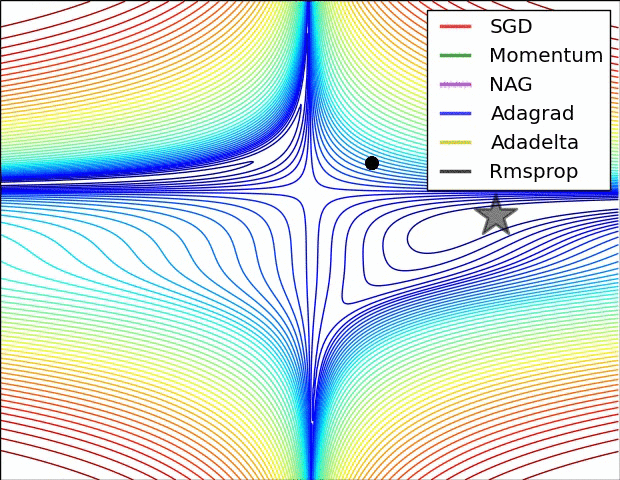

The details about these algorithms is so immense that barely I could cover them all in upcomming lectures. But it is entirely psossible to use these algortihms succesfully and apply to a lots of different learning problems without actually understanding
<code>**inner loop**</code> what these algorithms do. These algorithms main disadvantage is that they are quite a lot more complex than gradient descent. Unless it happend to be that you are an expert in numerical computing otherwise instead just use 
software library that handles that.

### DRAFT , - NOT LECTURE MATERIAL !

Advanced optimization algorithms by using sophisticated optimization library it makes the code just a little bit more opaque and harder to debug. But these algorithms run much faster than gradient descent, quite typically whenever dealing with large learning problem its common to use these algorithms instead of using gradient descent. 

### MATLAB / OCTAVE

<code>**NOT STUDIES MATERIAL**</code>

Problem with two parameters

\begin{multline*}
\theta =
\begin{bmatrix}
\theta_{1} \\
\theta_{2}
\end{bmatrix}
\end{multline*}

\begin{multline*}
J(\theta) = (\theta_{1} - 5)^2 + (\theta_{2} + 5)^2
\end{multline*}

The derivative of cost function 𝐽(𝜃) turn out be these those two expression.
\begin{multline*}
\dfrac{\partial}{\partial \theta_{1}} J(\theta) = 2(\theta_{1} - 5)
\end{multline*}
\begin{multline*}
\dfrac{\partial}{\partial \theta_{1}} J(\theta) = 2(\theta_{2} - 5)
\end{multline*}


\begin{multline*}
\min_{\theta} J(\theta)
\end{multline*}

\begin{multline*}
\theta_{1} = 5, \theta_{2} = 5
\end{multline*}

To apply one of the adanced optimization algorithms to minimize cost function 𝐽(𝜃). If we didin't know the mimimum was at 5, 5 but if we to find the parameters minimum numerically using something like gradient descent but preferably more advanced than that.

<code>**MATLAB/OCTAVE**</code>

In [ ]:
function [jVal, gradient] = costFunction(theta)
jVal        = (theta(1) - 5)^2 + (theta(2) - 5)^2;
gradient    = zeros(2, 1);
gradient(1) = 2*(theta(1) - 5);
gradient(2) = 2*(theta(2) - 5);

Implement <code>**costFunction(theta)**</code> function. It return two arguments:
 * <code>**jVal**</code>
 * <code>**gradient**</code>
 
<code>**jVal**</code> is how we would compute the cost function 𝐽(𝜃):<br>
<code>**jVal = (theta(1) - 5)^2 + (theta(2) - 5)^2;**</code>
<br>

<code>**gradient**</code> is going to be a <code>**2x1 vector**</code> as <code>**gradient = zeros(2, 1);**</code><br>
And the two elements of the gradient vector correspond to two partial derivatives<br>
<code>**gradient(1) = 2*(theta(1) - 5);**</code><br>
<code>**gradient(2) = 2*(theta(2) - 5);**</code>

Having implemented this cost function we would then call the advanced optimization function called <code>**fminunc**</code>.<br> That stands for <code>**function minimization unconstrained**.</code> And the way we call this is as folows
<br>

In [ ]:
options = optimset('GradObj', 'on', 'MaxIter', '100');
initTheta = zeros(2, 1);
[optTheta, functionVal, exitFlag] = fminunc(@costFunction, initTheta, options);

<code>**optimset**</code> as a data structure that stores the options we want:<br>
 * <code>**GradObj**</code> and <code>**on**</code> this sets the gradient objective parameter to on. It just mean we are indeed going to provde a gradient to this algorithm.
 * <code>**MaxIter**</code> and <code>**100**</code> set the maximum number of iterations
 
<code>**initTheta**</code> we are going to giveit an intial guess for theta, its a <code>**2x1 vector**</code> its dimensions has to be <code>**d ≥ 2**</code>
<br>
<code>**fminunc**</code> command is called with <code>**@costFunction**</code>, here @ symbol represents a pointer to our cost function <code>**costFunction(theta)**</code> that we defined earlier. <br>

And this will compute optimal value for theta parameters <code>**optTheta**</code><br>
<code>**functionVal**</code> contains the value at the optimum of the objective function<br>
<code>**exitFlag**</code> show the convergence status

<code>**NOTE!: help fminunc**</code> command returns entire documentation about this function

### Implementation in logistic regression

\begin{multline*}
\theta =
\begin{bmatrix}
\theta_{0} \\
\theta_{1} \\
. \\
. \\
. \\
\theta_{n} \\
\end{bmatrix}
\end{multline*}

In [ ]:
function [jVal, gradient] = costFunction(theta)
jVal          = [compute 𝐽(𝜃)];
gradient(1)   = [compute ∂/∂𝜃_0 𝐽(𝜃)];
gradient(2)   = [compute ∂/∂𝜃_1 𝐽(𝜃)];
.
.
.
gradient(n+1) = [compute ∂/∂𝜃_n 𝐽(𝜃)];